Introduction to Linear Algebra in ML

Systems of Linear Equations

Matrices and Matrix Operations

Singular vs Non-Singular Matrices

Determinants

Rank of a Matrix

Row Reduction

Null Space

Practical Implementation

Linear algebra is fundamental to machine learning:

Neural Networks: Matrix operations form the backbone

Image Recognition: Pixel data as matrices

Data Transformations: Dimensionality reduction, feature extraction

In [3]:
import numpy as np
import matplotlib.pyplot as plt


Complete: Unique solution exists
Redundant: Infinite solutions
Contradictory: No solution

## Contradictory: No solution
a + b = 10
a + 2b = 12

a = 8, b = 2
##  Infinite Solutions
a + b = 10
2a + 2b = 20

a + b = 10
## No Solution
a + b = 10
2a + 2b = 24

In [5]:
def solve_system_2x2(a1, b1, c1, a2, b2, c2):
    A = np.array([[a1, b1], [a2, b2]])
    b = np.array([c1, c2])
    
    try:
        solution = np.linalg.solve(A, b)
        return solution, "Unique solution"
    except np.linalg.LinAlgError:
        det = np.linalg.det(A)
        if det == 0:
            A_aug = np.column_stack((A, b))
            rank_A = np.linalg.matrix_rank(A)
            rank_A_aug = np.linalg.matrix_rank(A_aug)
            
            if rank_A == rank_A_aug:
                return None, "Infinite solutions"
            else:
                return None, "No solution"
        return None, "Error"

systems = [
    (1, 1, 10, 1, 2, 12),
    (1, 1, 10, 2, 2, 20),
    (1, 1, 10, 2, 2, 24)
]

for i, (a1, b1, c1, a2, b2, c2) in enumerate(systems, 1):
    solution, status = solve_system_2x2(a1, b1, c1, a2, b2, c2)
    print(f"System {i}: {status}")
    if solution is not None:
        print(f"  Solution: x = {solution[0]:.2f}, y = {solution[1]:.2f}")
    print()


System 1: Unique solution
  Solution: x = 8.00, y = 2.00

System 2: Infinite solutions

System 3: No solution



# Matrices and Matrix Operations

In [6]:
class LinearSystem:
    def __init__(self, A, b):
        self.A = np.array(A)
        self.b = np.array(b)
        
    def solve(self):
        try:
            x = np.linalg.solve(self.A, self.b)
            return x, "Unique solution"
        except np.linalg.LinAlgError:
            det = np.linalg.det(self.A)
            if abs(det) < 1e-10:
                rank_A = np.linalg.matrix_rank(self.A)
                A_aug = np.column_stack((self.A, self.b))
                rank_aug = np.linalg.matrix_rank(A_aug)
                if rank_A == rank_aug:
                    return None, "Infinite solutions"
                else:
                    return None, "No solution"
            return None, "Error"
    
    def display_system(self):
        n = self.A.shape[1]
        for i in range(len(self.b)):
            equation = " + ".join([f"{self.A[i,j]}x{j+1}" for j in range(n)])
            print(f"{equation} = {self.b[i]}")

systems_3x3 = [
    ([[1, 1, 1], [1, 2, 1], [1, 1, 2]], [10, 15, 12]),
    ([[1, 1, 1], [1, 1, 2], [1, 1, 3]], [10, 15, 20]),
    ([[1, 1, 1], [1, 1, 2], [1, 1, 3]], [10, 15, 18])
]

for i, (A, b) in enumerate(systems_3x3, 1):
    print(f"System {i}:")
    ls = LinearSystem(A, b)
    ls.display_system()
    solution, status = ls.solve()
    print(f"Status: {status}")
    if solution is not None:
        print(f"Solution: {solution}")
    print()


System 1:
1x1 + 1x2 + 1x3 = 10
1x1 + 2x2 + 1x3 = 15
1x1 + 1x2 + 2x3 = 12
Status: Unique solution
Solution: [3. 5. 2.]

System 2:
1x1 + 1x2 + 1x3 = 10
1x1 + 1x2 + 2x3 = 15
1x1 + 1x2 + 3x3 = 20
Status: Infinite solutions

System 3:
1x1 + 1x2 + 1x3 = 10
1x1 + 1x2 + 2x3 = 15
1x1 + 1x2 + 3x3 = 18
Status: No solution



# Singular vs Non-Singular Matrices

In [7]:
def analyze_matrix(A):
    A = np.array(A)
    det = np.linalg.det(A)
    rank = np.linalg.matrix_rank(A)
    
    print(f"Matrix:\n{A}")
    print(f"Determinant: {det:.2f}")
    print(f"Rank: {rank}")
    print(f"Shape: {A.shape}")
    
    if abs(det) < 1e-10:
        print("Status: SINGULAR matrix")
    else:
        print("Status: NON-SINGULAR matrix")
    print()

test_matrices = [
    [[1, 1], [1, 2]],
    [[1, 1], [2, 2]],
    [[1, 1, 1], [1, 2, 1], [1, 1, 2]],
    [[1, 1, 1], [1, 1, 2], [1, 1, 3]]
]

for i, matrix in enumerate(test_matrices, 1):
    print(f"Matrix {i}:")
    analyze_matrix(matrix)


Matrix 1:
Matrix:
[[1 1]
 [1 2]]
Determinant: 1.00
Rank: 2
Shape: (2, 2)
Status: NON-SINGULAR matrix

Matrix 2:
Matrix:
[[1 1]
 [2 2]]
Determinant: 0.00
Rank: 1
Shape: (2, 2)
Status: SINGULAR matrix

Matrix 3:
Matrix:
[[1 1 1]
 [1 2 1]
 [1 1 2]]
Determinant: 1.00
Rank: 3
Shape: (3, 3)
Status: NON-SINGULAR matrix

Matrix 4:
Matrix:
[[1 1 1]
 [1 1 2]
 [1 1 3]]
Determinant: 0.00
Rank: 2
Shape: (3, 3)
Status: SINGULAR matrix



# Determinants

In [8]:
def manual_determinant_2x2(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

def manual_determinant_3x3(matrix):
    a, b, c = matrix[0]
    d, e, f = matrix[1]
    g, h, i = matrix[2]
    positive = a*e*i + b*f*g + c*d*h
    negative = c*e*g + a*f*h + b*d*i
    return positive - negative

def compare_determinants(matrix):
    manual_det = manual_determinant_3x3(matrix) if len(matrix) == 3 else manual_determinant_2x2(matrix)
    numpy_det = np.linalg.det(matrix)
    
    print(f"Matrix:\n{np.array(matrix)}")
    print(f"Manual determinant: {manual_det}")
    print(f"NumPy determinant: {numpy_det:.2f}")
    print()

test_det_matrices = [
    [[1, 1], [1, 2]],
    [[1, 1], [2, 2]],
    [[1, 1, 1], [1, 2, 1], [1, 1, 2]],
    [[1, 0, 1], [0, 1, 0], [3, 2, 3]]
]

for matrix in test_det_matrices:
    compare_determinants(matrix)


Matrix:
[[1 1]
 [1 2]]
Manual determinant: 1
NumPy determinant: 1.00

Matrix:
[[1 1]
 [2 2]]
Manual determinant: 0
NumPy determinant: 0.00

Matrix:
[[1 1 1]
 [1 2 1]
 [1 1 2]]
Manual determinant: 1
NumPy determinant: 1.00

Matrix:
[[1 0 1]
 [0 1 0]
 [3 2 3]]
Manual determinant: 0
NumPy determinant: 0.00



# Rank of a Matrix

In [9]:
def matrix_rank_analysis(A):
    A = np.array(A)
    rank = np.linalg.matrix_rank(A)
    rows, cols = A.shape
    print(f"Matrix shape: {A.shape}, Rank: {rank}")
    print(f"Full rank: {rank == min(rows, cols)}\n")

rank_matrices = [
    [[1, 2], [3, 4]],
    [[1, 2], [2, 4]],
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
]

for matrix in rank_matrices:
    matrix_rank_analysis(matrix)


Matrix shape: (2, 2), Rank: 2
Full rank: True

Matrix shape: (2, 2), Rank: 1
Full rank: False

Matrix shape: (3, 3), Rank: 2
Full rank: False

Matrix shape: (3, 3), Rank: 3
Full rank: True



# Gaussian Elimination

In [10]:
def gaussian_elimination(A, b):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)
    aug = np.column_stack((A, b))
    for i in range(n):
        max_row = np.argmax(np.abs(aug[i:n, i])) + i
        aug[[i, max_row]] = aug[[max_row, i]]
        pivot = aug[i, i]
        if abs(pivot) > 1e-10:
            aug[i] /= pivot
        for j in range(i + 1, n):
            aug[j] -= aug[j, i] * aug[i]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = aug[i, -1] - np.dot(aug[i, i+1:n], x[i+1:n])
    return x

A = [[2, 1, -1], [-3, -1, 2], [-2, 1, 2]]
b = [8, -11, -3]
solution = gaussian_elimination(A, b)
print("Solution:", solution)


Solution: [ 2.  3. -1.]


# Null Space

In [11]:
def null_space_basis(A):
    A = np.array(A, dtype=float)
    rank = np.linalg.matrix_rank(A)
    n = A.shape[1]
    print(f"Rank: {rank}, Nullity: {n - rank}")
    if rank == n:
        print("Trivial null space")
        return np.array([])
    U, s, Vt = np.linalg.svd(A)
    return Vt[rank:].T

for matrix in [
    [[1, 2], [2, 4]],
    [[1, 2, 3], [4, 5, 6]],
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
]:
    print("Matrix:")
    print(np.array(matrix))
    print("Null space basis:\n", null_space_basis(matrix))
    print("-" * 50)


Matrix:
[[1 2]
 [2 4]]
Rank: 1, Nullity: 1
Null space basis:
 [[-0.89442719]
 [ 0.4472136 ]]
--------------------------------------------------
Matrix:
[[1 2 3]
 [4 5 6]]
Rank: 2, Nullity: 1
Null space basis:
 [[ 0.40824829]
 [-0.81649658]
 [ 0.40824829]]
--------------------------------------------------
Matrix:
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Rank: 3, Nullity: 0
Trivial null space
Null space basis:
 []
--------------------------------------------------


In [12]:
class LinearAlgebraToolkit:
    def __init__(self, A, b=None):
        self.A = np.array(A, dtype=float)
        self.b = np.array(b, dtype=float) if b is not None else None
        self.det = np.linalg.det(self.A)
        self.rank = np.linalg.matrix_rank(self.A)
    
    def report(self):
        print("="*40)
        print("Linear Algebra Report")
        print("="*40)
        print(f"Matrix A:\n{self.A}")
        print(f"Determinant: {self.det:.3f}")
        print(f"Rank: {self.rank}\n")

A1 = [[4, -1, 0], [-1, 4, -1], [0, -1, 4]]
b1 = [2, 6, 2]
LinearAlgebraToolkit(A1, b1).report()


Linear Algebra Report
Matrix A:
[[ 4. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  4.]]
Determinant: 56.000
Rank: 3



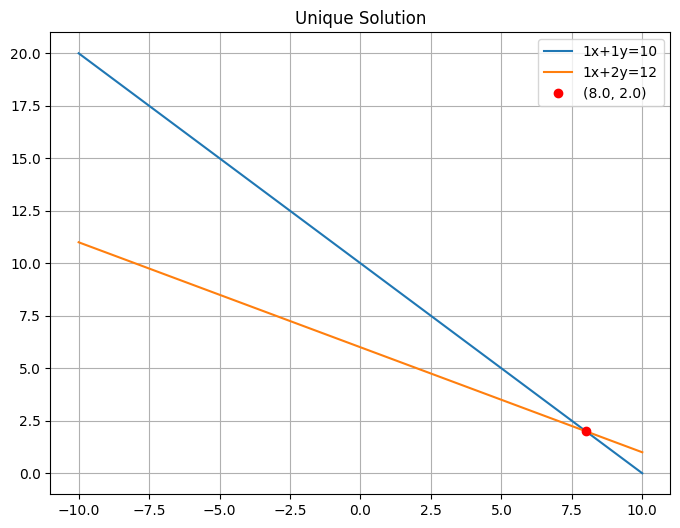

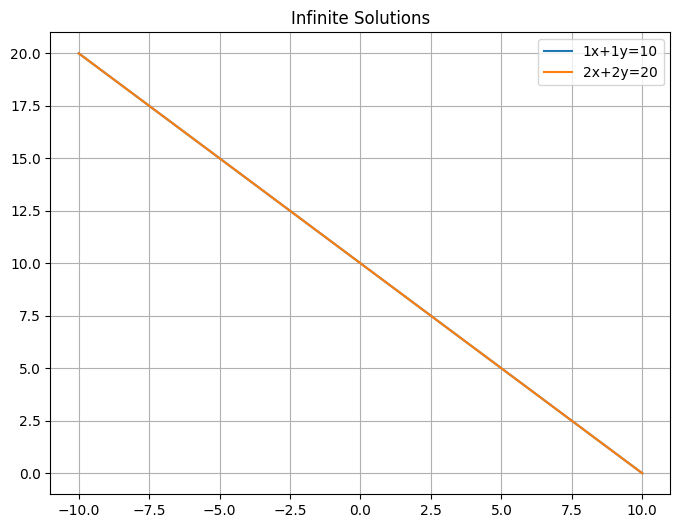

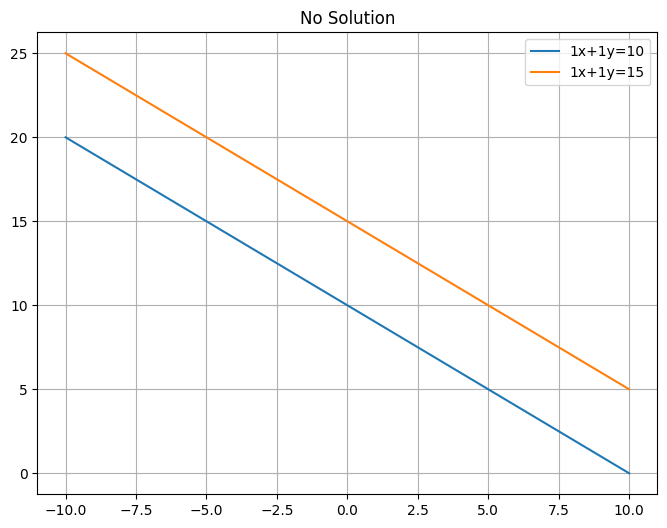

In [13]:
def plot_2d_system(a1, b1, c1, a2, b2, c2, title="2D System of Equations"):
    x = np.linspace(-10, 10, 400)
    y1 = (c1 - a1*x)/b1 if b1 != 0 else None
    y2 = (c2 - a2*x)/b2 if b2 != 0 else None
    plt.figure(figsize=(8,6))
    if y1 is not None: plt.plot(x, y1, label=f'{a1}x+{b1}y={c1}')
    if y2 is not None: plt.plot(x, y2, label=f'{a2}x+{b2}y={c2}')
    try:
        sol = np.linalg.solve(np.array([[a1,b1],[a2,b2]]), np.array([c1,c2]))
        plt.plot(sol[0], sol[1], 'ro', label=f'({sol[0]:.1f}, {sol[1]:.1f})')
    except: pass
    plt.legend(); plt.grid(True); plt.title(title); plt.show()

plot_2d_system(1,1,10,1,2,12,"Unique Solution")
plot_2d_system(1,1,10,2,2,20,"Infinite Solutions")
plot_2d_system(1,1,10,1,1,15,"No Solution")
